# SVM
* solves classification and regression problems

### Classification problem

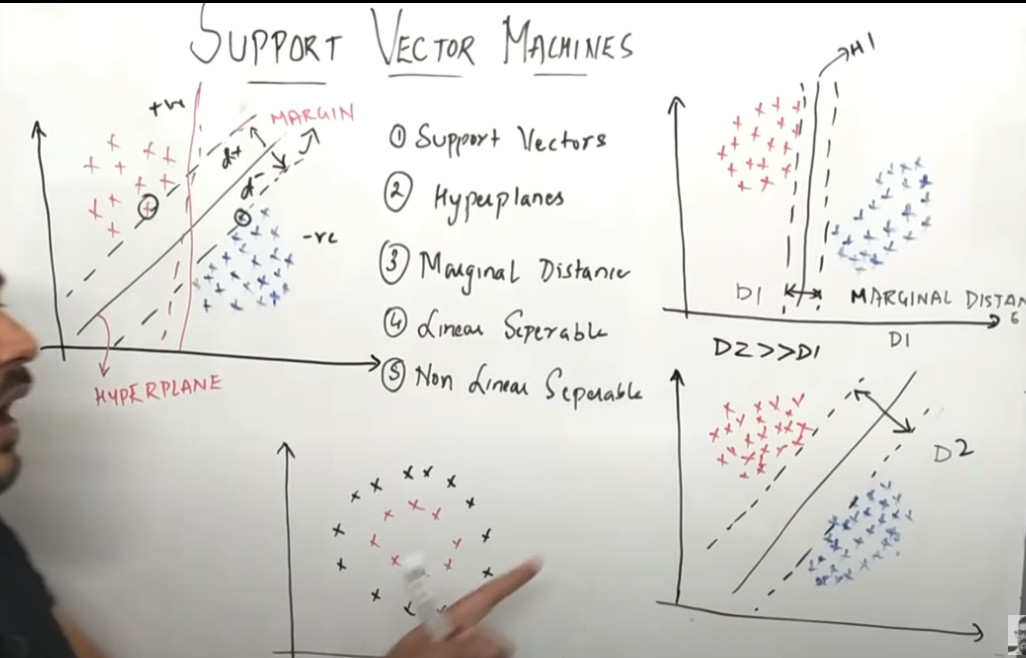

* Hyper planes - can be a line or a plane, works better is the data is linearly separable. For not linearly separable data we can use some of the tricks (higher order) available in SVM ,these tricks are called kernals and are used to use higher dimension toseparate the data.
* Marginal Distance - we want the hyperplane that generates the bigger marginal distance , here D2>>D1 which means D2 will work better generalizing. this distance is calculated between the parallel lines that touches the nearest data on each side of the hyperplane. these data is called support vecotrs
* Support Vectors are the data nearest at both sides of the hyperplane, these data or support vectors are used to create the margin distance  

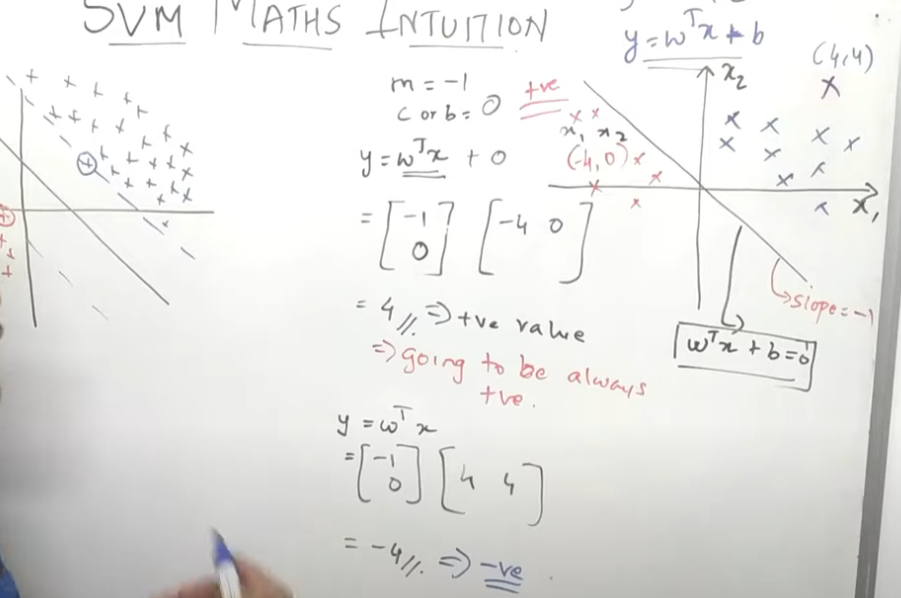

* to the left of the hyperplane the values will be always positive
* to the right of the hyper plane the values will be alwasy negative

### This is how we calcualte the positive and negative planes through the support vectors and parallel to the hyperplane. these positive and negative planes create the margin distance

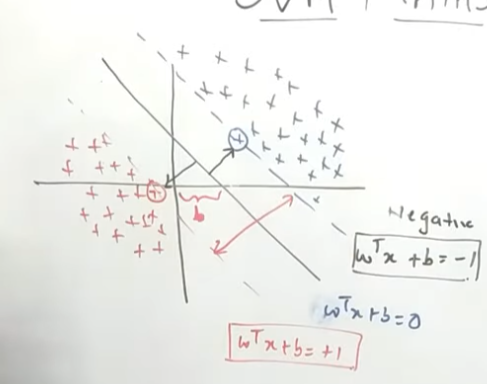

### This is how we create the equations for the positive/negative planes using the nearest support vectors, at the end we need to maximize the margin distance which is the same as maximizing the right side of the equation

* we need to find W and B in such a way that maximizes the equation 2/||W|| but following the conditions set :  Yi+WTXi+Bi >= 1  otherwise the point will be a missclassification
  
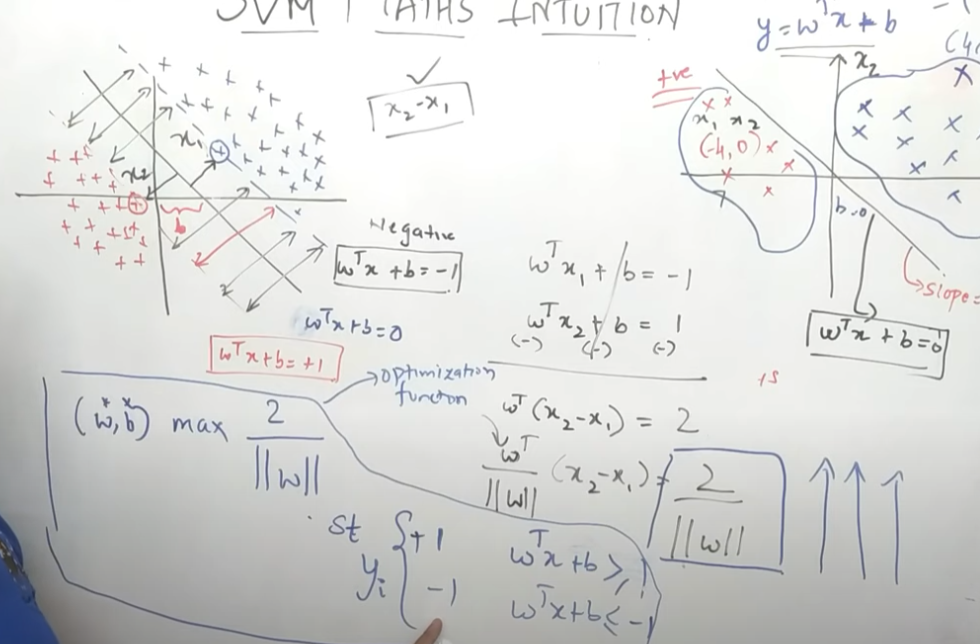

### To better optimize my solution i will rewrite min instead of max and add two more parameters Ci - how many error we will allow and Si - value of the error.
* Ci - is a sort of regularization and needs to be hyperparametrized

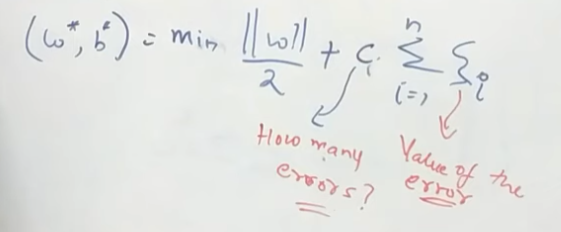

# SVM Kernels - transformation from lower dimensions to higher dimensions

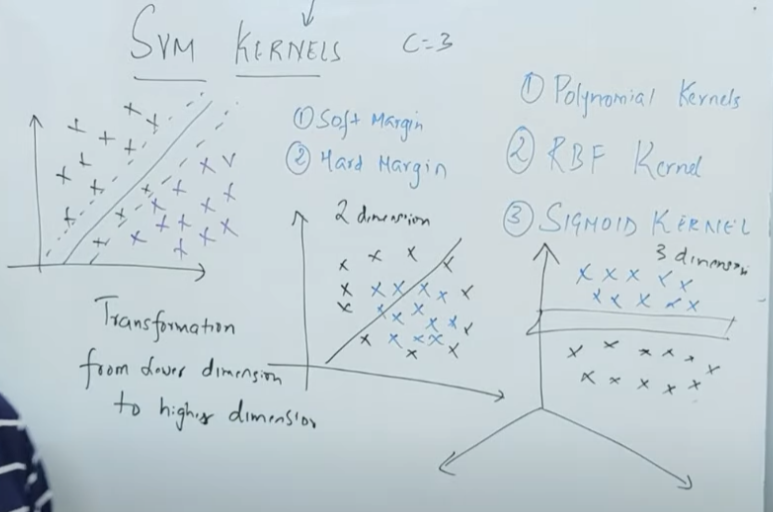

Example of trasnforming a 1D dataset into a 2D domain by using a mathematical transformation y=f(x) where x = x^2

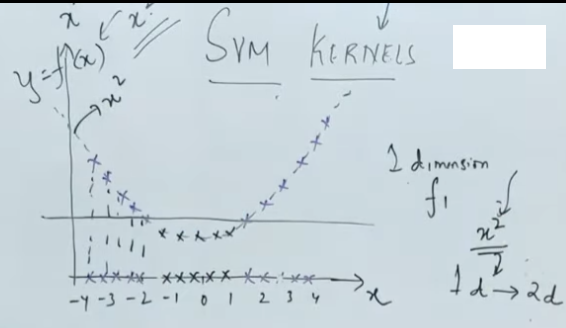

Example of polynomial Kernel operation, where d - dimensionality

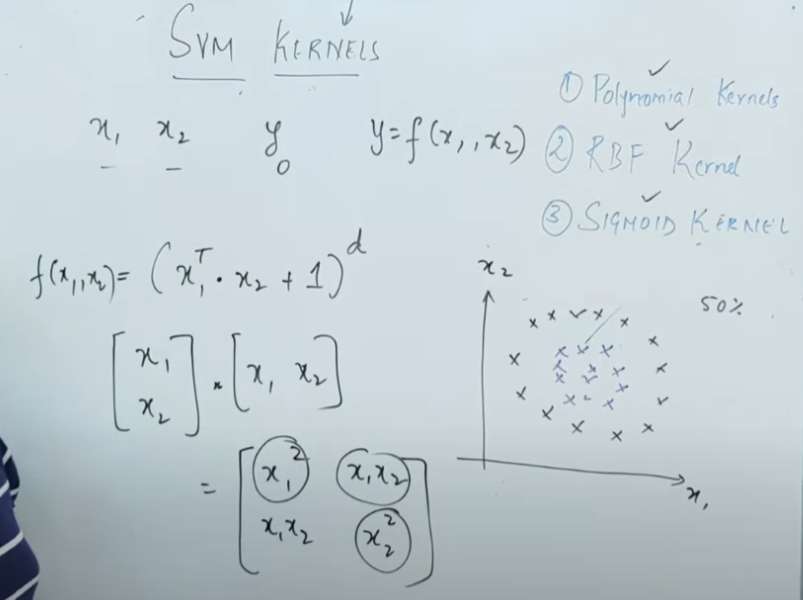

so it went from just x1,x2 to a x1^2, x2^ and x1x2 higher dimensional dataset, where the data can be easier separable

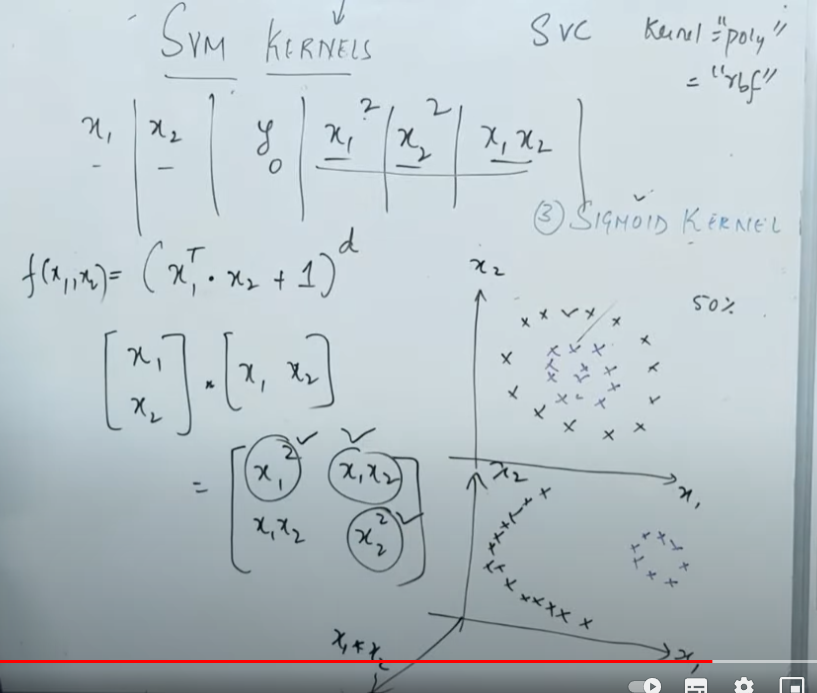

* Hyperplane tunning is used to find what kernel to use poly,rbf, sigmoid

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
print(x)
print(y)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

In [4]:
y = np.hstack([y,-y])  #Stack arrays in sequence horizontally (column wise).
x = np.hstack([x,-x])  #Stack arrays in sequence horizontally (column wise).
print(x)
print(y)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

In [9]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])  #Stack arrays in sequence horizontally (column wise).
x1 = np.hstack([x1,-x1])  #Stack arrays in sequence horizontally (column wise).

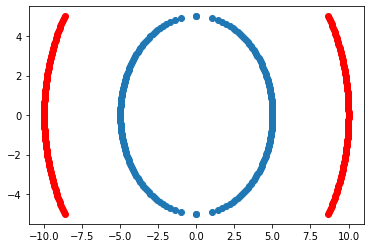

In [10]:
plt.scatter(y,x,color="r")
plt.scatter(y1,x1)

In [14]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1',"X2"])    #Stack arrays in sequence vertically (row wise).
df1['Y']=0
df1

X1       X2  Y
0    8.660254 -5.00000  0
1    8.717792 -4.89899  0
2    8.773790 -4.79798  0
3    8.828277 -4.69697  0
4    8.881281 -4.59596  0
..        ...      ... ..
195 -8.881281 -4.59596  0
196 -8.828277 -4.69697  0
197 -8.773790 -4.79798  0
198 -8.717792 -4.89899  0
199 -8.660254 -5.00000  0

[200 rows x 3 columns]

In [18]:
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1',"X2"])    #Stack arrays in sequence vertically (row wise).
df2['Y']=1
df2

X1       X2  Y
0    0.000000 -5.00000  1
1    0.999949 -4.89899  1
2    1.406908 -4.79798  1
3    1.714198 -4.69697  1
4    1.969049 -4.59596  1
..        ...      ... ..
195 -1.969049 -4.59596  1
196 -1.714198 -4.69697  1
197 -1.406908 -4.79798  1
198 -0.999949 -4.89899  1
199 -0.000000 -5.00000  1

[200 rows x 3 columns]

In [19]:
df = df1.append(df2)    # data appended at the end
df

X1       X2  Y
0    8.660254 -5.00000  0
1    8.717792 -4.89899  0
2    8.773790 -4.79798  0
3    8.828277 -4.69697  0
4    8.881281 -4.59596  0
..        ...      ... ..
195 -1.969049 -4.59596  1
196 -1.714198 -4.69697  1
197 -1.406908 -4.79798  1
198 -0.999949 -4.89899  1
199 -0.000000 -5.00000  1

[400 rows x 3 columns]

In [21]:
# train and test data split
X = df.iloc[:,:2]
y = df.Y


In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(400, 2) (400,)
(300, 2) (300,) (100, 2) (100,)


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC( kernel = "linear")
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)     # showing that a linear separation does not provide a good outcome

0.45

### Polynomial Kernel
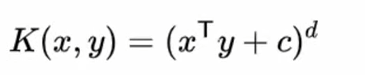

In [29]:
# find components for the polynomial kernel : X1,X2, X1^2, X2^2, X1X2
df["X1_square"] = df["X1"]**2
df["X2_square"] = df["X2"]**2
df["X1X2"] = df["X1"]*df["X2"]
df

X1       X2  Y  X1_square  X2_square       X1X2
0    8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1    8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2    8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3    8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4    8.881281 -4.59596  0  78.877155  21.122845 -40.818009
..        ...      ... ..        ...        ...        ...
195 -1.969049 -4.59596  1   3.877155  21.122845   9.049671
196 -1.714198 -4.69697  1   2.938476  22.061524   8.051537
197 -1.406908 -4.79798  1   1.979390  23.020610   6.750316
198 -0.999949 -4.89899  1   0.999898  24.000102   4.898740
199 -0.000000 -5.00000  1   0.000000  25.000000   0.000000

[400 rows x 6 columns]

In [31]:
y = df.Y
X = df.drop("Y",axis=1)
X


X1       X2  X1_square  X2_square       X1X2
0    8.660254 -5.00000  75.000000  25.000000 -43.301270
1    8.717792 -4.89899  75.999898  24.000102 -42.708375
2    8.773790 -4.79798  76.979390  23.020610 -42.096467
3    8.828277 -4.69697  77.938476  22.061524 -41.466150
4    8.881281 -4.59596  78.877155  21.122845 -40.818009
..        ...      ...        ...        ...        ...
195 -1.969049 -4.59596   3.877155  21.122845   9.049671
196 -1.714198 -4.69697   2.938476  22.061524   8.051537
197 -1.406908 -4.79798   1.979390  23.020610   6.750316
198 -0.999949 -4.89899   0.999898  24.000102   4.898740
199 -0.000000 -5.00000   0.000000  25.000000   0.000000

[400 rows x 5 columns]

In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [33]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(400, 5) (400,)
(300, 5) (300,) (100, 5) (100,)


In [34]:
X_train

X1        X2  X1_square  X2_square       X1X2
50   4.999745  0.050505  24.997449   0.002551   0.252512
63   9.906589  1.363636  98.140496   1.859504  13.508984
112 -3.263736  3.787879  10.651974  14.348026 -12.362637
159 -9.953852 -0.959596  99.079176   0.920824   9.551676
83   3.680983  3.383838  13.549638  11.450362  12.455852
..        ...       ...        ...        ...        ...
123 -4.223140  2.676768  17.834915   7.165085 -11.304366
192 -9.031653 -4.292929  81.570758  18.429242  38.772248
117 -9.445795  3.282828  89.223038  10.776962 -31.008922
47   9.996811 -0.252525  99.936231   0.063769  -2.524447
172 -9.738311 -2.272727  94.834711   5.165289  22.132526

[300 rows x 5 columns]

In [36]:
%matplotlib inline
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1X2', color='Y')  # original parameters X1,X2
fig.show()

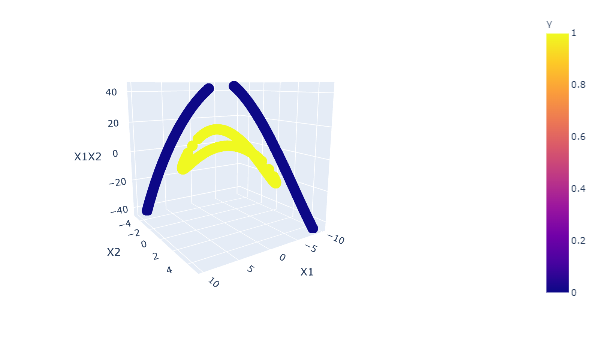

In [41]:
%matplotlib inline
import plotly.express as px
fig = px.scatter_3d(df, x='X1_square', y='X2_square', z='X1X2', color='Y')   # polynomial transformed parameters allows now separating the data with a plane
fig.show()

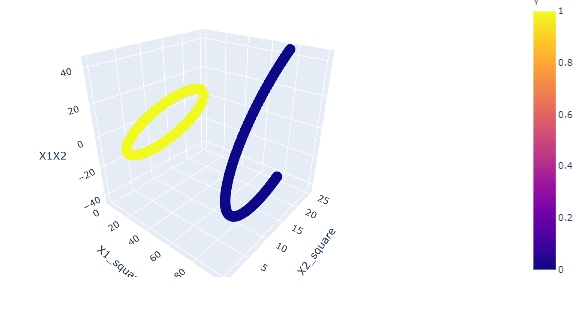

In [42]:
# we are using here a linear kernel because we have transformed manually the input parameters X1,X2 into X1^2,X2^2,X1*X2

classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

# RBF Kernel

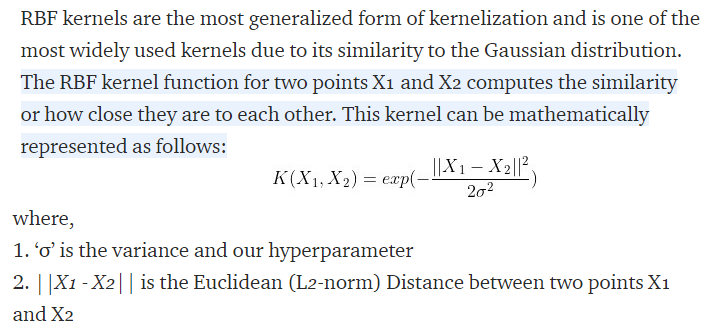

In [48]:
X = df[["X1","X2"]].copy()
y=df.Y.copy()
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(400, 2) (400,)
(300, 2) (300,) (100, 2) (100,)


In [49]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0